# ML LAB 09 - September 16, 2020 | Prasenjit Dey (1947114) 

## Support Vector Classifier (SVC)

- Classification using Linear, Polynomial and Radial Basis Function (RBF) Kernels. Demonstrate the Impact of Regularization.
- Demonstrate GridSearchCV method for obtaining optimal hyperparameters for classification using RBF kernel.

## Brief Introduction about SVC in Machine Learning
- Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.
- In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.
- Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).

## Importing Required Libraries

In [ ]:
import pandas as p
import numpy as n
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder                     #encoding
from sklearn.preprocessing import StandardScaler                   #standardisation
from sklearn.model_selection import train_test_split               #train/test split
from sklearn.model_selection import cross_val_score                #K-fold cross validation

#SVM libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV                   #to find best parameter

import matplotlib.pyplot as m

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## The Dataset : Gender Recognition by Voice and Speech Analysis

- This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.
- The voice samples are pre-processed by acoustic analysis using the seewave, with an analyzed frequency range of 0hz-280hz (human vocal range).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataframe from CSV File

dataframe = p.read_csv('/content/drive/My Drive/voice.csv')
dataframe.head()

meanfreq        sd    median       Q25  ...    maxdom   dfrange   modindx  label
0  0.059781  0.064241  0.032027  0.015071  ...  0.007812  0.000000  0.000000   male
1  0.066009  0.067310  0.040229  0.019414  ...  0.054688  0.046875  0.052632   male
2  0.077316  0.083829  0.036718  0.008701  ...  0.015625  0.007812  0.046512   male
3  0.151228  0.072111  0.158011  0.096582  ...  0.562500  0.554688  0.247119   male
4  0.135120  0.079146  0.124656  0.078720  ...  5.484375  5.476562  0.208274   male

[5 rows x 21 columns]

## Dataset Exploration

In [ ]:
dataframe.shape
#Features = 21, Instances = 3168

(3168, 21)

**Features = 21** and **Instances Found = 3168**

Number of cells labeled Male    :  1584
Number of cells labeled Female  :  1584

% of Voices labeled Male           :  50.0 %
% of Voices labeled Female         :  50.0 %


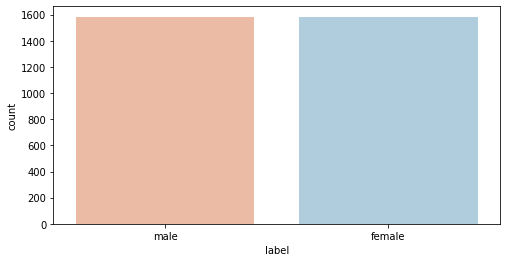

In [ ]:
# visualize distribution of classes 

m.figure(figsize=(8, 4))
sns.countplot(dataframe['label'], palette='RdBu')

# count number of observations in each class
male, female = dataframe['label'].value_counts()
print('Number of cells labeled Male    : ', male)
print('Number of cells labeled Female  : ', female)
print('')
print('% of Voices labeled Male           : ', round(male / len(dataframe) * 100, 2), '%')
print('% of Voices labeled Female         : ', round(female / len(dataframe) * 100, 2), '%')

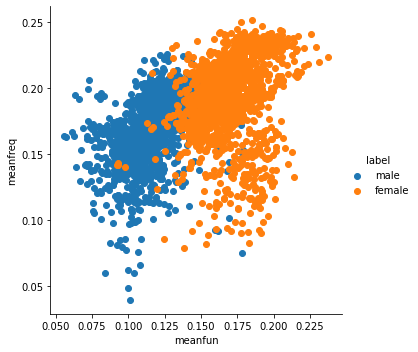

In [ ]:
sns.FacetGrid(dataframe, hue="label", height=5).map(m.scatter, "meanfun", "meanfreq").add_legend()
m.show()

In [ ]:
# Datatype Information

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

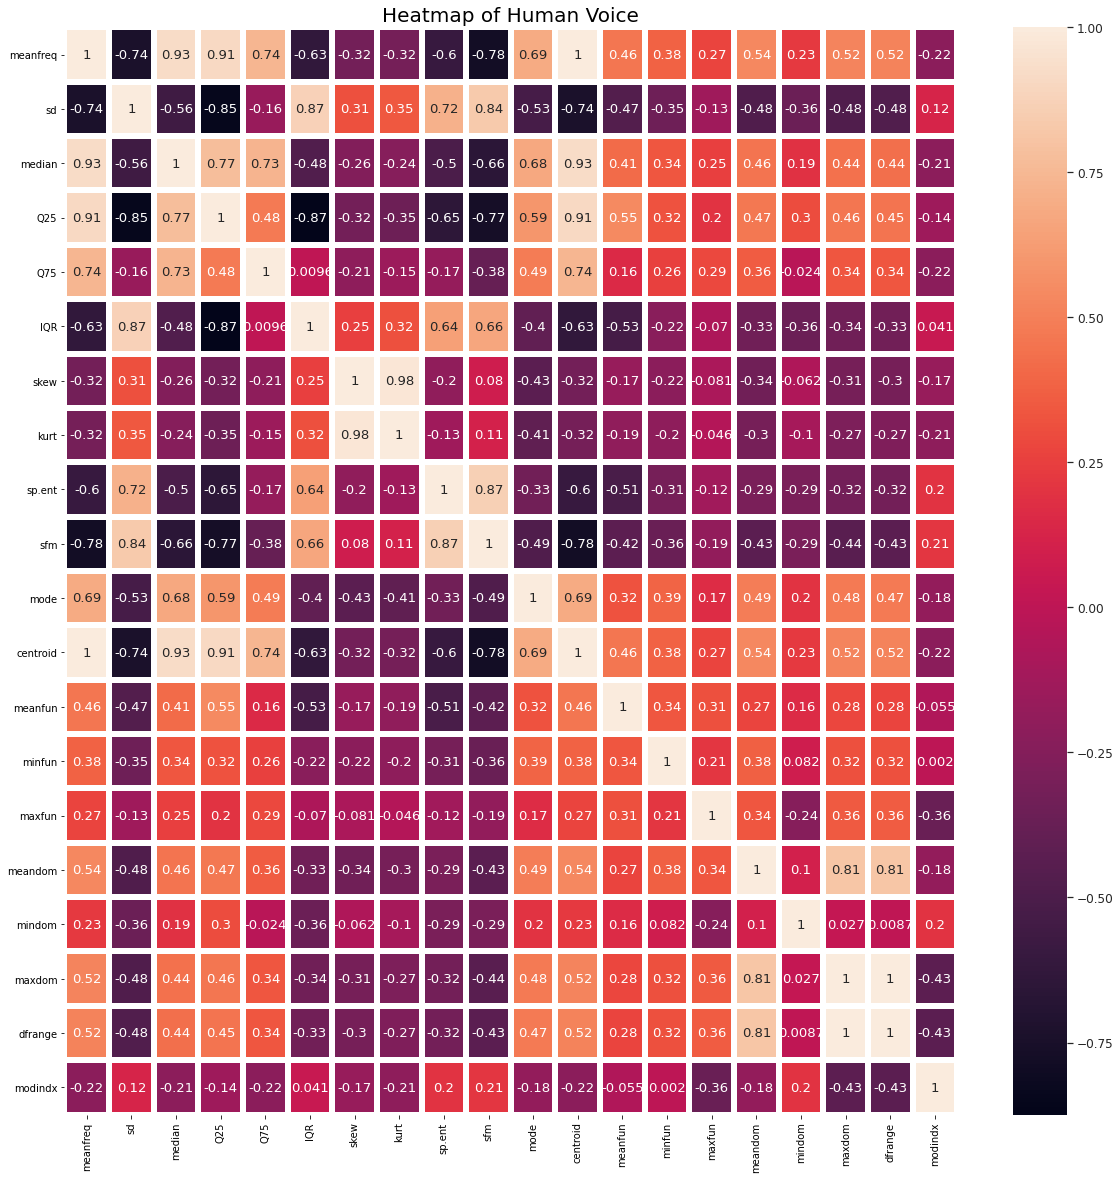

In [ ]:
# Correlation Via HeatMap

f,ax = m.subplots(figsize = (20,20))
m.title("Heatmap of Human Voice", fontsize=20)
sns.set(font_scale=1.1)
sns.heatmap(dataframe.corr(), linewidth = 5, linecolor = "white", annot = True, ax = ax)
m.yticks(rotation='horizontal')
m.show()

In [ ]:
# Checking for Null Values

dataframe.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Label Encoding and Standardization

In [ ]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
encode = LabelEncoder()
y = encode.fit_transform(y)
y
print('Male Label Encoded as ------> 1')
print('Female Label Encoded as ----> 0')

Male Label Encoded as ------> 1
Female Label Encoded as ----> 0


**Why Standardization of datasets is necessary?** 
- It is a common requirement for many machine learning estimators implemented in scikit-learn.
- They might behave badly if the individual features do not more or less look like standard normally distributed data.

In [ ]:
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

## Implementation of Support Vector Classifier (SVC) Kernels without Regularization

In [ ]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Spliting the features and labels into 80% Training and 20% Test Data

#### Default SVC (with Linear Kernel)

Accuracy of Deafult Linear Kernal :
0.9779179810725552

The Confusion Matrix for Linear Kernel
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



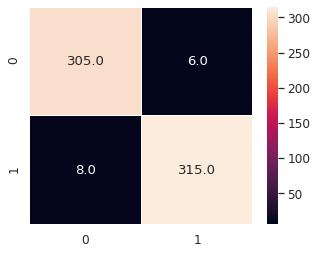

In [ ]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_predict_linear = svc_linear.predict(X_test)
print('Accuracy of Deafult Linear Kernal :')
print(metrics.accuracy_score(y_test, y_predict_linear))
print('')

print('The Confusion Matrix for Linear Kernel')
print('----------------------------------------------------------')
print(classification_report(y_test,y_predict_linear))

results_rl=metrics.classification_report(y_true=y_test, y_pred=y_predict_linear)

cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=y_predict_linear)
f,ax = m.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#### Default SVC (with Polynomial Kernel)

Accuracy of Default Polynomial Kernal:
0.9589905362776026

The Confusion Matrix for Polynomial
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       311
           1       0.94      0.98      0.96       323

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



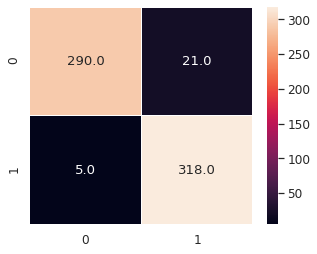

In [ ]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
y_predict_poly = svc_poly.predict(X_test)
print('Accuracy of Default Polynomial Kernal:')
print(metrics.accuracy_score(y_test, y_predict_poly))
print('')

print('The Confusion Matrix for Polynomial')
print('----------------------------------------------------------')
print(classification_report(y_test,y_predict_poly))


results_rl=metrics.classification_report(y_true=y_test, y_pred=y_predict_poly)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=y_predict_poly)
f,ax = m.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

#### Default SVC (with RBF Kernel)

Accuracy of Deafult RBF Kernal:
0.9763406940063092

The Confusion Matrix for RBF Kernel
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



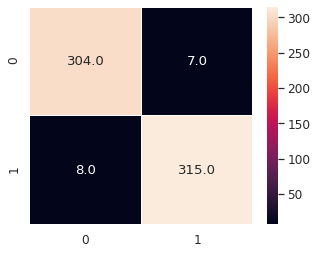

In [ ]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
y_predict_rbf = svc_rbf.predict(X_test)
print('Accuracy of Deafult RBF Kernal:')
print(metrics.accuracy_score(y_test, y_predict_rbf))
print('')

print('The Confusion Matrix for RBF Kernel')
print('----------------------------------------------------------')
print(classification_report(y_test,y_predict_rbf))

results_rl=metrics.classification_report(y_true=y_test, y_pred=y_predict_rbf)

#Confusion matrix
cm_rl=metrics.confusion_matrix(y_true=y_test, y_pred=y_predict_rbf)
f,ax = m.subplots(figsize=(5, 4))
sns.heatmap(cm_rl, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

## The Metrics after the Impact of Regularization

In [ ]:
# Linear Kernel with Regularization

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.simplefilter('ignore')

print('Accuracy of Linear Kernal (without Regularization) :', metrics.accuracy_score(y_test, y_predict_linear))

svc_linear_reg = SVC(kernel='linear', C=0.1, max_iter=1000)
svc_linear_reg.fit(X_train, y_train)
y_pred_linear = svc_linear_reg.predict(X_test)

print("\nLinear Kernel Metrics with Regularization")
print('')
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_linear))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_linear, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_linear, average='macro'))*100, "%")

Accuracy of Linear Kernal (without Regularization) : 0.9779179810725552

Linear Kernel Metrics with Regularization

Accuracy   : 97.47634069400631 %
Precision  : 97.47543627368023 %
Recall     : 97.47543627368023 %


In [ ]:
# Polynomial Kernel with Regularization

svc_poly_reg = SVC(kernel='poly', C=0.1, max_iter=1000)
svc_poly_reg.fit(X_train, y_train)
y_pred_polynomial = svc_poly_reg.predict(X_test)

print('Accuracy of Polynomial Kernal (without Regularization) :', metrics.accuracy_score(y_test, y_predict_poly))

print("\nPolynomial Kernel Metrics with Regularization")
print('')
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_polynomial))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_polynomial, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_polynomial, average='macro'))*100, "%")

Accuracy of Polynomial Kernal (without Regularization) : 0.9589905362776026

Polynomial Kernel Metrics with Regularization

Accuracy   : 92.42902208201893 %
Precision  : 93.27799562051229 %
Recall     : 92.30087702706739 %


In [ ]:
# RBF Kernel with Regularization
svc_rbf_reg = SVC(kernel='rbf', C=0.1, max_iter=1000)
svc_rbf_reg.fit(X_train, y_train)
y_pred_rbf = svc_rbf_reg.predict(X_test)

print('Accuracy of RBF Kernal (without Regularization) :', metrics.accuracy_score(y_test, y_predict_rbf))

print("\nRBF Kernel Metrics with Regularization")
print('')
print("Accuracy   :", (metrics.accuracy_score(y_test, y_pred_rbf))*100, "%")
print("Precision  :", (precision_score(y_test, y_pred_rbf, average='macro'))*100, "%")
print("Recall     :", (recall_score(y_test, y_pred_rbf, average='macro'))*100, "%")

Accuracy of RBF Kernal (without Regularization) : 0.9763406940063092

RBF Kernel Metrics with Regularization

Accuracy   : 95.89905362776025 %
Precision  : 95.92904479545568 %
Recall     : 95.8796651170199 %


## Hyperparameter Tuning using Grid Search Cross-Validation

- **Grid Search** is the process of performing **HyperParameter Tuning** in order to determine the optimal values for a given model. 
- This is significant as the performance of the entire model is based on the hyper parameter values specified.

In [ ]:
# Performing Grid search technique to find the best parameter among all the Kernels

svm = SVC()
tuned_parameters = {
 'C': (n.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (n.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 
 'C': (n.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [ ]:
model = GridSearchCV(svm, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
model.fit(X_train, y_train)
print(model.best_score_)

0.9569745728424264


In [ ]:
print(model.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


## Advantages and Disadvantages of SVC

#### **Advatanges**
- Works relatively well when there is clear margin of separation between classes.
- More effective in high dimensional spaces.
- Effective in cases where number of dimensions is greater than the number of samples.
- Relatively memory efficient.

#### **Disadvantages**
- It is not suitable for large data sets.
- It also doesn't performs well when the data set has more noise i.e. target classes are overlapping.
- If number of features for each data point exceeds the number of training data sample, the SVM will underperform.

## Applications of SVM in Real World

- **Face Detection** – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
- **Text Categorization** – SVMs allow Text and hypertext categorization for both inductive and transductive models. T
- **Image Classification** – It provides better accuracy in comparison to the traditional query-based searching techniques.
- **Bioinformatics** – For identifying the classification of genes, patients on the basis of genes and other biological problems.

================================================================================================ | Prasenjit Dey - ML LAB 09